# CNA PREP and RESULTS TISSUE CELLS
## Sid Gurajala
## 05/01/2023

## Libraries 

In [1]:
library(patchwork)
library(purrr)
library(dplyr) 
library(tidyr)
library(cowplot)
library(singlecellmethods)
library(ggplot2)
library(ggbeeswarm)
library(stringr)
library(viridis)
source("/data/srlab/anathan/scripts/scseq_utils.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘singlecellmethods’


The following object is masked from ‘package:base’:

    rowMeans


Loading required package: viridisLite



In [2]:
labelfontsize = 20
tickfontsize = 16

figdir = '../../figures/components/'

In [1]:
source("/data/srlab/ssg34/SLE_kidney_v2/scripts/libs/kidney_utils.r")
clinical <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/clinical_data_05042023.rds') %>% 
                        rename(Final_Site = Site) %>% select(-sample)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, turbo, viridis


The following objects are masked from ‘package:viridisLite’:

    cividis, inferno, magma, plasma, turbo, viridis



Attaching package: ‘singlecellmethods’


The following object is masked from ‘package:SeuratObject’:

    rowMeans


The following object is masked from ‘package:base’:

    rowMeans


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘p

In [ ]:
#all_meta <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/20230215_Tissue/meta_Tissue_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-02-22-23.rds')
norm <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/normalized_data_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-8-10-22.rds')

In [ ]:
rawcounts <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds')
mito_genes_subset <- c("MT-ND5", "MT-ND6")
percent_mito <- colSums(rawcounts[mito_genes_subset, ]) / colSums(rawcounts) * 100
percent_mito <- data.frame(cell = names(percent_mito), percent.mt = percent_mito)

In [ ]:
saveRDS(percent_mito, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')

In [8]:
percent_mito <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')

In [10]:
all_cell_meta <- read.csv('/data/srlab/ssg34/share/for_Roopa/QC_Annotated_Full_Kidney_Meta_sc_sn_03292024.csv')

In [12]:
percent_mito <- percent_mito %>% 
                    mutate(dataset = ifelse(str_detect(cell, "AMPSLEkid_cells") == TRUE,
                                            "scRNAseq", "snRNAseq"))
percent_mito %>% 
    filter(cell %in% all_cell_meta$cell) %>% 
    group_by(dataset) %>% 
    summarize(max_mito = max(percent.mt))

dataset,max_mito
<chr>,<dbl>
scRNAseq,2.7965284
snRNAseq,0.3656307


In [20]:
all_cell_meta %>% 
    group_by(dataset) %>% 
    summarize(min_genes = min(nFeature_RNA),
              min_reads = min(nCount_RNA))

dataset,min_genes,min_reads
<chr>,<int>,<int>
scRNAseq,501,1001
snRNAseq,543,1001


In [ ]:
kpmp_markers <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/KPMP_markers.csv')

# ALL CELL TYPE UMAP FIGURE

## MERGE ALL CELL TYPES

In [8]:
tnk_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/qcd/T_NK_clusterQCd_meta_harmonizedPCUMAPclusters_annotations02062024.rds')
myeloid_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/qcd/Myeloid_clusterQCd_meta_harmonizedPCUMAPCellStateClusters_10042022.rds')
bp_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/qcd/BP_clusterQCd_cellstate_meta_annotations_09232022.rds')

In [9]:
pt_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/pt_meta_qcd_harmony_umap_clusternames_11302023.rds')
dn_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/dn_meta_qcd_harmony_umap_clusternames_11302023.rds')
loh_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/loh_meta_qcd_harmony_umap_clusternames_11302023.rds')
intl_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/intl_meta_qcd_harmony_umap_clusternames_11302023.rds')
glom_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/glom_meta_qcd_harmony_umap_clusternames_11302023.rds')


In [ ]:
all_cell_meta <- rbind(pt_meta %>% 
                    select(cell, sample, dataset, Site, processing.batch, Type, 
                           nFeature_RNA, nCount_RNA, final_annotation, new_cluster_number) %>% 
                    mutate(cell.type = "Proximal Tubule") %>% 
                    rename(annotation = final_annotation),
                 dn_meta %>% 
                    select(cell, sample, dataset, Site, processing.batch, Type,
                          nFeature_RNA, nCount_RNA, final_annotation, new_cluster_number) %>% 
                    mutate(cell.type = "Distal Nephron") %>% 
                    rename(annotation = final_annotation),
                 loh_meta %>% 
                    select(cell, sample, dataset, Site, processing.batch, Type,
                          nFeature_RNA, nCount_RNA, final_annotation, new_cluster_number) %>% 
                    mutate(cell.type = "Loop of Henle") %>% 
                    rename(annotation = final_annotation),
                 intl_meta %>% 
                    select(cell, sample, dataset, Site, processing.batch, Type,
                          nFeature_RNA, nCount_RNA, final_annotation, new_cluster_number) %>% 
                    mutate(cell.type = "Interstitial/Stromal") %>% 
                    rename(annotation = final_annotation),
                 glom_meta %>% 
                    select(cell, sample, dataset, Site, processing.batch, Type,
                          nFeature_RNA, nCount_RNA, final_annotation, new_cluster_number) %>% 
                    mutate(cell.type = "Glomerular") %>% 
                    rename(annotation = final_annotation),
                 tnk_meta %>% 
                    select(cell, sample, dataset, Site, processing.batch, Type,
                          nFeature_RNA, nCount_RNA, annotation, new_cluster_number) %>% 
                    mutate(cell.type = "T/NK"),
                 myeloid_meta %>% 
                    select(cell, sample, dataset, Site, processing.batch, Type, 
                          nFeature_RNA, nCount_RNA, annotation) %>% 
                    mutate(cell.type = "Myeloid"),
                 bp_meta %>% 
                    select(cell, sample, dataset, Site, processing.batch, Type,
                          nFeature_RNA, nCount_RNA, annotation, new_cluster_number) %>% 
                    mutate(cell.type = "B/Plasma"))

In [65]:
write.csv(all_cell_meta, '/data/srlab/ssg34/share/for_Roopa/QC_Annotated_Full_Kidney_Meta_sc_sn_03292024.csv',
          quote = FALSE, row.names = FALSE)

In [124]:
cluster_order <- c("T/NK", "Myeloid", "B/Plasma",
                   "Proximal Tubule", "Interstitial",
                   "Glomerular", "Loop of Henle", "Distal Nephron")

In [ ]:
fig.size(10, 15)

total_prop <- all_cell_meta %>% filter(dataset == 'scRNAseq') %>% 
                    select(Type, cell.type) %>% table() %>% data.frame() %>%
                    group_by(Type) %>% 
                    mutate(prop = Freq / sum(Freq)) 
ggplot(total_prop,
       aes(y = cell.type, x = prop, fill = Type)) + 
    geom_bar(position = position_dodge(),
             stat = "identity") + 
    labs(x = "Proportion", y = "",
         ) + 
    theme_classic(base_size = 25) + 
    theme(axis.text.y = element_text(size = 30)) +
    theme(legend.position = "none") + 
    scale_y_discrete(limits = cluster_order) + 
    scale_x_continuous(limits = c(0, 0.6)) + 
    scale_fill_manual(values = rev(c("darkorchid", 'darkolivegreen4')))


total_prop <- all_cell_meta %>% filter(dataset == 'snRNAseq') %>% 
                    select(Type, cell.type) %>% table() %>% data.frame() %>% 
                    group_by(Type) %>% 
                    mutate(prop = Freq / sum(Freq)) 
ggplot(total_prop,
       aes(y = cell.type, x = prop, fill = Type)) + 
    geom_bar(position = position_dodge(),
             stat = "identity") + 
    labs(x = "Proportion", y = "",
         ) + 
    theme_classic(base_size = 25) + 
    theme(axis.text.y = element_text(size = 30)) +
    theme(legend.position = "none") + 
    scale_y_discrete(limits = cluster_order) + 
    scale_x_continuous(limits = c(0, 0.6)) + 
    scale_fill_manual(values = rev(c("darkorchid", 'darkolivegreen4')))

In [ ]:
total_prop <- all_cell_meta %>% filter(dataset == 'scRNAseq') %>% 
                    select(Type, cell.type) %>% table() %>% data.frame() %>% 
                    group_by(Type) %>% 
                    mutate(Freq = Freq / sum(Freq)) 

In [ ]:
cell_list <- c(tnk_meta[sample(round((nrow(tnk_meta) / nrow(all_meta)) * 100000), nrow(qcd_meta)), ]) %>% pull(cell)
round((nrow(tnk_meta) / nrow(all_meta)) * 100000)

In [ ]:
downsample <- function(cell_meta, cell_type, all_meta) {
    all_cells <- nrow(all_meta)
    df <- cell_meta[sample(x = nrow(cell_meta), 
                           size = round((nrow(cell_meta) / all_cells) * 100000)), ] 
    df <- df %>% select(cell, sample, dataset, 
                           Site, processing.batch) %>% 
                 mutate(cell.type = cell_type)
    return(df)
}

In [ ]:
downsampled_meta <- rbind(downsample(tnk_meta, "T/NK", all_meta),
                          downsample(myeloid_meta, "Myeloid", all_meta),
                          downsample(bp_meta, "B/Plasma", all_meta),
                          downsample(pt_meta, "Proximal Tubule", all_meta),
                          downsample(dn_meta, "Distal Nephron", all_meta),
                          downsample(loh_meta, "Loop of Henle", all_meta),
                          downsample(intl_meta, "Interstitial", all_meta),
                          downsample(glom_meta, "Glomerular", all_meta))

In [ ]:
saveRDS(downsampled_meta, 
        "/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/downsampled_meta.rds")
saveRDS(norm[, downsampled_meta$cell],
        "/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/downsampled_norm.rds")

In [2]:
downsampled_meta <- readRDS("/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/downsampled_meta.rds")

In [4]:
all_meta <- read.csv('/data/srlab/ssg34/share/for_Roopa/QC_Annotated_Full_Kidney_Meta_sc_sn_03292024.csv')

In [9]:
downsampled_meta <- downsampled_meta %>% 
                        left_join(all_meta %>% select(cell, Type, nFeature_RNA, nCount_RNA)) %>% 
                        left_join(percent_mito)
saveRDS(downsampled_meta, 
        "/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/downsampled_meta.rds")

Joining, by = "cell"
Joining, by = "cell"


## TABLE 1

In [5]:
all_cell_meta <- read.csv('/data/srlab/ssg34/share/for_Roopa/QC_Annotated_Full_Kidney_Meta_sc_sn_03292024.csv')

In [28]:
all_cell_meta <- all_cell_meta %>% 
                    mutate(individual = ifelse(dataset == 'scRNAseq', 
                                               str_remove(sample, "AMPSLEkid_cells_"), 
                                               str_remove(sample, "AMPSLEkid_nuc_")))

In [29]:
clinical <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/clinical_data_05042023.rds') %>% rename(Final_Site = Site)

In [73]:
first_biop_pred <- readRDS("/data/srlab2/qxiao/AMP-SLE/data/clinical/df_pred_biop.rds") %>% 
                        mutate(individual = str_split(Subject_ID, '-')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[2])

In [33]:
clinical_LN <- clinical %>% 
                filter(Type == "LN",
                       individual %in% unique(all_cell_meta$individual))
clinical_ctrl <- clinical %>% 
                    filter(Type == "Control",
                            individual %in% unique(all_cell_meta$individual))

In [70]:
med_use <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/meds_scRNA_kidney.csv') %>% mutate(individual = gsub("SLE", "", patientID))

## Cluster

In [ ]:
all_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/final_meta.rds')

In [ ]:
all_harmony <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/harmony.rds')

In [ ]:
resolution_list <- c(0.1, 0.2, 0.3, 0.4)
snn_ref <- BuildSNNSeurat(all_meta[,paste0("hPC-", 1:20)], nn.eps = 0)
ids_ref <- Reduce(cbind, mclapply(resolution_list, function(res_use) {
    Seurat:::RunModularityClustering(SNN = snn_ref, modularity = 1, 
        resolution = res_use, algorithm = 1, n.start = 20, 
        n.iter = 20, random.seed = 100, print.output = FALSE, 
        temp.file.location = NULL, edge.file.name = NULL)
}, mc.preschedule = FALSE, mc.cores = min(20, length(resolution_list))))
gc()
colnames(ids_ref) <- sprintf("hres.%.2f", resolution_list)

In [ ]:
all_meta <- all_meta %>% cbind(ids_ref)

## PLOT

In [ ]:
all_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/final_meta.rds')

In [ ]:
norm <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/normalized_data_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-8-10-22.rds')

In [6]:
cluster_center <- all_meta %>%
                  group_by(cell.type) %>%
                  summarise_at(vars(huwotUMAP1, huwotUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

Saving 6.67 x 6.67 in image


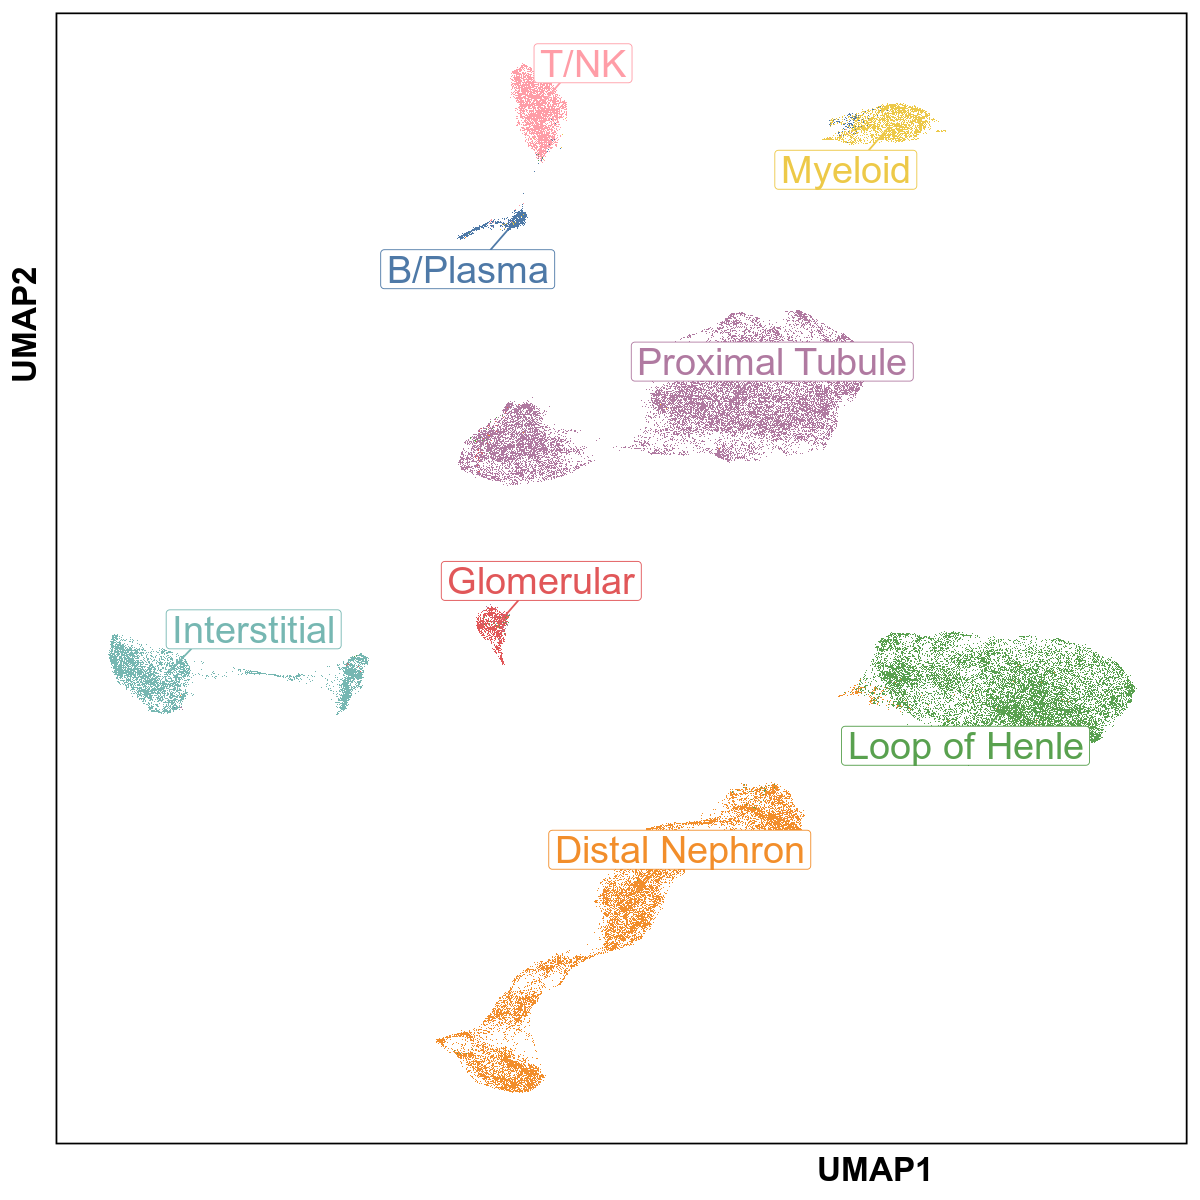

In [8]:
options(repr.plot.height = 10, repr.plot.width = 10)

p <- ggplot() +
      geom_point(
        data = all_meta[sample(nrow(all_meta)), ] %>% 
          select(huwotUMAP1, huwotUMAP2, cell.type) %>% 
                  mutate(cell.type = as.factor(cell.type)), 
        aes(x = huwotUMAP1, y = huwotUMAP2, color = cell.type),
        size = 0.1, stroke = 0.0001, shape = 20
      ) +
      ggrepel::geom_label_repel(
        data = cluster_center,
        aes(x = huwotUMAP1, y = huwotUMAP2, 
            label = cell.type, color = cell.type),
        size = 8,  
        box.padding = unit(1, "lines"),
        point.padding = unit(0.2, "lines"),
          show.legend = FALSE,
      ) +
        ggthemes::scale_color_tableau(palette = "Tableau 10") +
    theme_classic(base_size = 15) +
      theme(
        legend.position = "none",
            #  plot.title = element_text(hjust = 0.5, 
            #                            size = 18, 
            #                            face = "bold"),
              axis.title = element_text(hjust = 0.75, 
                                        size = 20, 
                                        face = "bold"), 
              axis.text = element_blank(),
              axis.line = element_blank(),
              axis.ticks = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1)
    ) +
        labs(x = "UMAP1", y = "UMAP2") +
        guides(color = guide_legend(ncol = 1, override.aes = list(size = 8)))
p
ggsave("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure1/figure1e.png", 
       p)

In [3]:
all_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/final_meta.rds')

In [ ]:
write.csv(all_meta, '/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/final_meta.csv',
          quote = FALSE)

In [28]:
fig.size(25, 25)
ptprc <- plot_shuffled_features(all_meta, 
                       norm, 
                       "PTPRC", 
                       pct = 0.99, 
                       pt_size = 0.1,
                       legend_break = 1) + 
scale_color_viridis(name = "Expression", breaks = c(0, 0.75, 1.5, 2.25, 3.0))

lrp2 <- plot_shuffled_features(all_meta, 
                       norm, 
                       "LRP2", 
                       pct = 0.99, 
                       pt_size = 0.1,
                       legend_break = 1) + 
scale_color_viridis(name = "Expression", breaks = c(0, 0.9, 1.8, 2.7, 3.6))

slc12a1 <- plot_shuffled_features(all_meta, 
                       norm, 
                       "SLC12A1", 
                       pct = 0.99, 
                       pt_size = 0.1,
                       legend_break = 1) + 
scale_color_viridis(name = "Expression", breaks = c(0, 1.2, 2.4, 3.6, 4.8))

pecam1 <- plot_shuffled_features(all_meta, 
                       norm, 
                       "PECAM1", 
                       pct = 0.99, 
                       pt_size = 0.1,
                       legend_break = 1) + 
scale_color_viridis(name = "Expression", breaks = c(0, 0.9, 1.8, 2.7))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [29]:
fig.size(20, 25)
expr_grid <- cowplot::plot_grid(ptprc, lrp2, slc12a1, pecam1)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure1/figure1f.png",
                   expr_grid,
                   nrow = 2,
                   ncol = 2,
                   base_height = 4,
                   base_width = 6)

## PSEUDOBULK

In [16]:
downsampled_meta <- readRDS("/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/downsampled_meta.rds")
downsampled_norm <- readRDS("/data/srlab/ssg34/SLE_kidney_v2/data/downsampled_all/downsampled_norm.rds")

In [ ]:
out <- mclapply(unique(downsampled_meta$sample), pseudobulk, downsampled_meta, downsampled_norm,
               mc.cores = 6)

In [36]:
downsampled_pb <- data.frame(do.call(rbind, out))

In [37]:
sample_stats <- downsampled_meta %>% group_by(sample) %>% summarize(avg_count = mean(nCount_RNA), avg_mt = mean(percent.mt))
downsampled_pb <- downsampled_pb %>% left_join(sample_stats) 

Joining, by = "sample"


In [39]:
downsampled_pb <- downsampled_pb[grep("cells", downsampled_pb$sample), ]
colnames(downsampled_pb)[1:36601] <- rownames(downsampled_norm)

In [41]:
saveRDS(downsampled_pb, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/downsampled_norm_pseudobulk_10122024.rds')

## ISG Gene Subset

In [20]:
downsampled_pb <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/downsampled_norm_pseudobulk_10122024.rds')

In [25]:
arazi_isg_genes <- unique(c(
  "BATF2", "IFI44L", "XAF1", "OASL", "IFI44",
  "OAS2", "TRIM6", "HES4", "OTOF", "IFI44L",
  "DDX60", "IFITM3", "IFIT3", "CXCL10", "SERPING1",
  "SPATS2L", "RSAD2", "LY6E", "OAS1", "IFIT1",
  "IFIT3", "OAS3", "OAS1", "OASL", "CMPK2",
  "HERC5", "OAS1", "MX1", "HERC6",
  "IFITM1", "TRIM5", "EIF2AK2", "AIM2", "MT1A",
  "MOV10", "CCL8", "HELZ2", "ZBP1", "WARS",
  "LAP3", "TNFSF10", "GBP1", "STAT1", "FBXO6",
  "PARP10", "OAS2", "TRIM22", "PARP10", "GBP3",
  "ZNF684", "CARD17", "GALM", "DHX58", "CEACAM1",
  "UBE2L6", "CEACAM1", "APOL6", "SOCS1", "DDX58",
  "UBE2L6", "TNFAIP6", "IDO1", "GBP6", "STAT2",
  "TIMM10", "STAT1", "PARP12", "PARP9", "GBP1",
  "GBP4", "IFIH1", "IRF7", "PARP14", "IFIT2",
  "IFI35", "STAT1", "IFIT5", "ZNFX1", "PHF11",
  "ACTA2", "SP140", "ABCA1", "TCN2", "ZC3HAV1",
  "HSH2D", "GBP2", "TRIM5", "RHBDF2", "TMEM140",
  "ADAR", "BTN3A1", "LGALS9", "NBN", "TYMP",
  "SRBD1", "NCOA7", "UNC93B1", "SP100", "DHRS9",
  "TRANK1", "TRIM5", "NT5C3A", "ASPRV1", "IRF9",
  "REC8", "RNF213", "ISG20", "DYNLT1", "TRIM56",
  "SP140", "TRIM38", "PSMB9", "CPT1B", "BST2",
  "NMI", "RBCK1", "TRAFD1", "TRIM21", "CARD16",
  "CHMP5", "TAP2", "SP110", "GADD45B", "TAP1"
))

In [28]:
sds <- data.frame()
for (gene in arazi_isg_genes) {
    sds <- sds %>% rbind(data.frame("Std" = sd(downsampled_pb[, gene]),
                                    "Gene" = gene)) 
}

In [32]:
genes <- sds %>% arrange(desc(Std)) %>% slice(1:20) %>% pull(Gene)

In [33]:
saveRDS(genes, '/data/srlab/ssg34/SLE_kidney_v2/data/pseudobulk_de/isg_genes.rds')

## CASE CONTROL CNA

In [ ]:
first_biop_pred <- readRDS("/data/srlab2/qxiao/AMP-SLE/data/clinical/df_pred_biop.rds") %>% 
                        mutate(individual = str_split(Subject_ID, '-')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[2])


sc_meta <- all_meta[, !colnames(all_meta) %in% colnames(clinical)] %>% 
                        mutate(kid_sample = all_meta$sample) %>% 
                        filter(dataset == 'scRNAseq') %>% 
                        mutate(individual = str_split(kid_sample, '_')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[3]) %>% 
                        left_join(clinical) %>% 
                        left_join(first_biop_pred) %>% 
                        select(c(cell, paste0('hPC-', 1:20), Sex, huwotUMAP1, huwotUMAP2, sample, cell.type,
                                 Responder.Status, Age, Race, Final_ISN, Final_Chronicity, Final_Activity, Type, Final_Site,
                                 First_biop, Pred_use)) 

sn_meta <- all_meta[, !colnames(all_meta) %in% colnames(clinical)] %>% 
                        mutate(kid_sample = all_meta$sample) %>% 
                        filter(dataset == 'snRNAseq') %>% 
                        mutate(individual = str_split(kid_sample, '_')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[3]) %>% 
                        left_join(clinical) %>% 
                        left_join(first_biop_pred) %>% 
                        select(c(cell, paste0('hPC-', 1:20), Sex, huwotUMAP1, huwotUMAP2, sample, cell.type,
                                 Responder.Status, Age, Race, Final_ISN, Final_Chronicity, Final_Activity, Type, Final_Site,
                                 First_biop, Pred_use)) 

In [ ]:
meta <- sc_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('UMAP', colnames(sn_meta))])))
harmony <- sc_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sc_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Type)]

meta <- meta[ind, ]
umap <- umap[ind, ]
harmony <- harmony[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Case.Control = c(0, 1),
                                      Type = c("Control", "LN")))

meta <- meta %>% left_join(data.frame(Responder_Status = c(0, 1, 2),
                                      Responder.Status = c("NR", "PR", "CR")))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")



write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sc_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sc_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sc_umap.csv', 
          row.names = FALSE, quote = FALSE)

In [ ]:
meta <- sn_meta %>% select(-c(colnames(sn_meta[grep('hPC-', colnames(sn_meta))]), 
                          colnames(sn_meta[grep('UMAP', colnames(sn_meta))])))
harmony <- sn_meta %>% select(colnames(sn_meta)[grep('hPC-', colnames(sn_meta))])

umap <- sn_meta %>% select(c(huwotUMAP1, huwotUMAP2))

ind <- c(1:nrow(meta))[!is.na(meta$Type)]

meta <- meta[ind, ]
umap <- umap[ind, ]
harmony <- harmony[ind, ]

meta$Age <- as.numeric(scale(meta$Age))
meta$Sex <- as.numeric(as.factor(meta$Sex))
meta$Final_Chronicity <- as.factor(as.numeric(meta$Final_Chronicity))
meta$Final_Activity <- as.factor(as.numeric(meta$Final_Activity))

meta <- meta %>% left_join(data.frame(Case.Control = c(0, 1),
                                      Type = c("Control", "LN")))

meta <- meta %>% left_join(data.frame(Responder_Status = c(0, 1, 2),
                                      Responder.Status = c("NR", "PR", "CR")))

meta$Responder_Status <- as.numeric(meta$Responder_Status)
meta$First_biop <- as.numeric(meta$First_biop)
meta$Pred_use <- as.numeric(meta$Pred_use)



meta <- fastDummies::dummy_cols(meta, "Race")
meta <- fastDummies::dummy_cols(meta, "Final_ISN")
meta <- fastDummies::dummy_cols(meta, "Final_Site")



write.csv(meta, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sn_meta.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(harmony, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sn_harmony.csv', 
          row.names = FALSE, quote = FALSE)
write.csv(umap, '/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sn_umap.csv', 
          row.names = FALSE, quote = FALSE)

### RESULTS

In [4]:
options(warn=-1)
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sc_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sc_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sc_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sc_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

fdr <- fdrs %>% filter(fdr < 0.05) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% mutate(ncorr_thresh = ifelse(abs(meta$ncorr) > fdr, ncorr, NA))
tmp_meta <- cbind(tmp_meta, umap)


In [6]:
title = 'scRNA-Seq'

In [10]:
tmp_meta = tmp_meta %>% rename(hUMAP1 = huwotUMAP1, hUMAP2 = huwotUMAP2)

In [7]:
globalp = 9.999000099990002e-05 # From ssg34/SLE_kidney_v2/scripts/cna/T_NK_CNA.ipynb
pheno = 'LN'

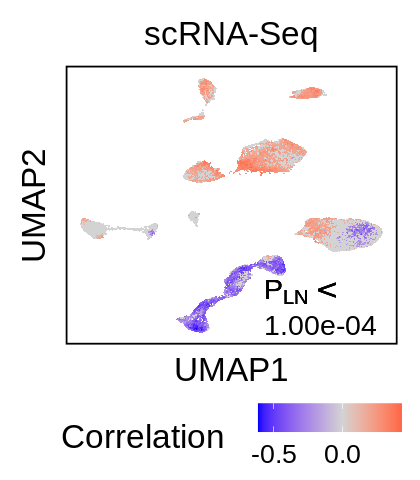

In [47]:
fig.size(3, 3)
cna_umap <- ggplot() + 
      geom_point(data = tmp_meta,
                aes(x = hUMAP1, y = hUMAP2), color = 'lightgrey', size = 0.75, stroke = 1e-10, shape = 20) + 
      geom_point(
      data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr_thresh), 
          aes(x = hUMAP1, y = hUMAP2, color = correlation), size = 0.75, stroke = 1e-10, shape = 20) + 
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey",
                            guide = guide_colorbar(direction = "horizontal"),
                           breaks = seq(-1, 1, by = 0.5)
                           ) + 
    theme_classic(base_size = tickfontsize) +
      theme(
        legend.position = "right",
        legend.text = element_text(size = labelfontsize-4),
        legend.title = element_text(size = labelfontsize),
          plot.title = element_text(hjust = 0.5, size = labelfontsize),
          axis.title = element_text(size = labelfontsize), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
    ) +
    annotate("text", x = .5, y = -10, hjust = 0,
         label = bquote(P[.(pheno)] < ""), 
         size = 6)+
    annotate("text", x = .5, y = -14, hjust = 0, 
         label = bquote(.(formatC(globalp, format = "e", digits = 2))), 
         size = 6)+
    labs(title = title, x = "UMAP1", y = "UMAP2", color = 'Correlation') + 
    theme(text=element_text(family="Arial")) 
umap_legend <- cowplot::get_legend(cna_umap)
cna_umap <- cna_umap + theme(legend.position = "none")
umap_legend <- cowplot::plot_grid(umap_legend)


height = 4
width = 3.5
fig.size(height, width)
outplot = cna_umap + umap_legend + plot_layout(heights = c(6, 1.5))
outplot

ggsave(paste0(figdir, 'downsampled_sc_cna_umap.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'downsampled_sc_cna_umap.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`
Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`
Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


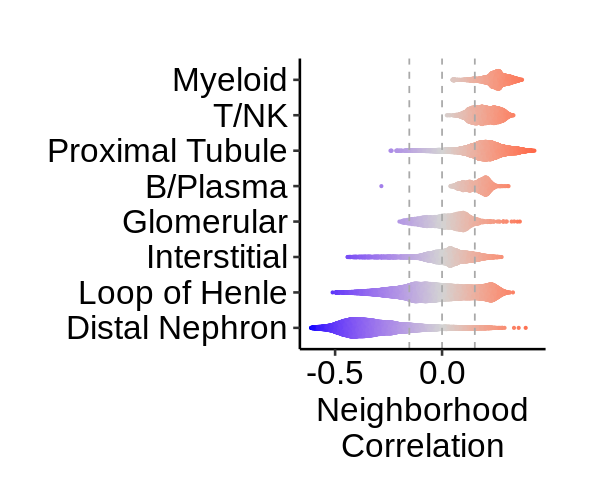

In [50]:
# meta = meta %>% mutate(final_annotation_num = final_annotation %>% str_split('. ') %>% map(1) %>% unlist)
meta = meta %>% mutate(final_annotation_num = cell.type)
pos_fdr_thresh <- fdr
neg_fdr_thresh <- -1 * fdr

interval <- c(-max(abs(meta$ncorr)), max(abs(meta$ncorr)))


violin_plot <- ggplot(meta, aes(y = reorder(final_annotation_num, ncorr), x = ncorr)) +
                    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
                    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
                    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
                    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
                    scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey",
                                            guide = guide_colorbar(direction = "horizontal"),
                                           breaks = seq(-1, 1, by = 0.5)
                                           ) + 
                    scale_x_continuous(breaks = pretty(meta$ncorr, n = 3)) +
                    labs( x= "Neighborhood\nCorrelation", y = "", title = "") +
                    theme_classic(base_size = tickfontsize) +
                    theme(text=element_text(family="Arial"),
                        legend.position = "none",
                        panel.grid = element_blank(),
                        axis.text.x = element_text(color = "black", size = labelfontsize, hjust=0.5),
                        axis.text.y = element_text(color = "black", size = labelfontsize, hjust=1),
                        axis.title = element_text(size=labelfontsize, hjust = 0.5),
                        axis.line.x.bottom = element_line(color = 'black'),
                        axis.line.y.left   = element_line(color = 'black'),
                        plot.margin = margin(10, 40, 10, 10)
                         
                         )

height = 4
width = 5.1
fig.size(height, width)
outplot = violin_plot #+ plot_layout(heights = c(6, 1.5))
outplot

ggsave(paste0(figdir, 'downsampled_sc_violin_plot.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'downsampled_sc_violin_plot.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

In [57]:
options(warn=-1)
meta <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sn_meta.csv')
umap <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sn_umap.csv')
ncorr <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sn_ncorr.csv", header = FALSE)
fdrs <- read.csv("/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/downsampled_tissue/case_control/sn_fdrs.csv", header = FALSE)
colnames(fdrs) <- c('threshold', 'fdr', 'ncells')
meta$ncorr <- ncorr$V1

fdr <- fdrs %>% filter(fdr < 0.05) %>% 
            mutate(fdr = round(fdr, 4)) %>% 
            filter(fdr == max(fdr)) %>% 
            pull(threshold)

tmp_meta <- meta %>% mutate(ncorr_thresh = ifelse(abs(meta$ncorr) > fdr, ncorr, NA))
tmp_meta <- cbind(tmp_meta, umap)


In [52]:
title = 'snRNA-Seq'

In [58]:
tmp_meta = tmp_meta %>% rename(hUMAP1 = huwotUMAP1, hUMAP2 = huwotUMAP2)

In [54]:
globalp = 9.999000099990002e-05 # From ssg34/SLE_kidney_v2/scripts/cna/T_NK_CNA.ipynb
pheno = 'LN'

In [56]:
tmp_meta %>% colnames

[1] "cell"                                    
 [2] "Sex"                                     
 [3] "sample"                                  
 [4] "cell.type"                               
 [5] "Responder.Status"                        
 [6] "Age"                                     
 [7] "Race"                                    
 [8] "Final_ISN"                               
 [9] "Final_Chronicity"                        
[10] "Final_Activity"                          
[11] "Type"                                    
[12] "Final_Site"                              
[13] "First_biop"                              
[14] "Pred_use"                                
[15] "Case.Control"                            
[16] "Responder_Status"                        
[17] "Race_.A."                                
[18] "Race_.B."                                
[19] "Race_.U."                                
[20] "Race_.W."                                
[21] "Final_ISN_.III."                         
[22] "Final_ISN_.III..V."                      
[23] "Final_ISN_.IV."                          
[24] "Final_ISN_.IV..V."                       
[25] "Final_ISN_.V."                           
[26] "Final_ISN_NA"                            
[27] "Final_Site_Cincinnati"                   
[28] "Final_Site_JHU"                          
[29] "Final_Site_Michigan"                     
[30] "Final_Site_MUSC"                         
[31] "Final_Site_Northwell"                    
[32] "Final_Site_NYU"                          
[33] "Final_Site_Rochester"                    
[34] "Final_Site_Texas.Tech"                   
[35] "Final_Site_UCSF"                         
[36] "ncorr"                                   
[37] "ifelse(abs(meta$ncorr) > fdr, ncorr, NA)"
[38] "hUMAP1"                                  
[39] "hUMAP2"

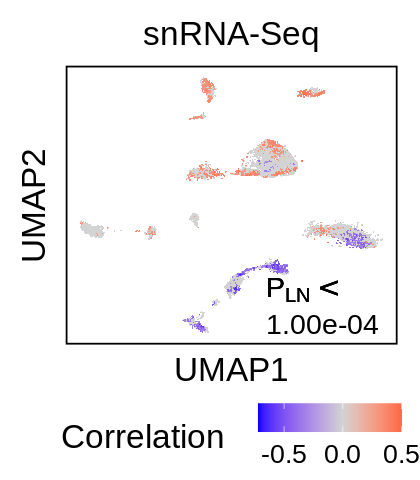

In [62]:
fig.size(3, 3)
cna_umap <- ggplot() + 
      geom_point(data = tmp_meta,
                aes(x = hUMAP1, y = hUMAP2), color = 'lightgrey', size = 0.75, stroke = 1e-10, shape = 20) + 
      geom_point(
      data = tmp_meta[sample(nrow(tmp_meta)),] %>% rename(correlation = ncorr_thresh), 
          aes(x = hUMAP1, y = hUMAP2, color = correlation), size = 0.75, stroke = 1e-10, shape = 20) + 
      scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey",
                            guide = guide_colorbar(direction = "horizontal"),
                           breaks = seq(-1, 1, by = 0.5)
                           ) + 
    theme_classic(base_size = tickfontsize) +
      theme(
        legend.position = "right",
        legend.text = element_text(size = labelfontsize-4),
        legend.title = element_text(size = labelfontsize),
          plot.title = element_text(hjust = 0.5, size = labelfontsize),
          axis.title = element_text(size = labelfontsize), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1)
    ) +
    annotate("text", x = .5, y = -9.5, hjust = 0,
         label = bquote(P[.(pheno)] < ""), 
         size = 6)+
    annotate("text", x = .5, y = -13.5, hjust = 0, 
         label = bquote(.(formatC(globalp, format = "e", digits = 2))), 
         size = 6)+
    labs(title = title, x = "UMAP1", y = "UMAP2", color = 'Correlation') + 
    theme(text=element_text(family="Arial")) 
umap_legend <- cowplot::get_legend(cna_umap)
cna_umap <- cna_umap + theme(legend.position = "none")
umap_legend <- cowplot::plot_grid(umap_legend)


height = 4
width = 3.5
fig.size(height, width)
outplot = cna_umap + umap_legend + plot_layout(heights = c(6, 1.5))
outplot

ggsave(paste0(figdir, 'downsampled_sn_cna_umap.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'downsampled_sn_cna_umap.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`
Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`
Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


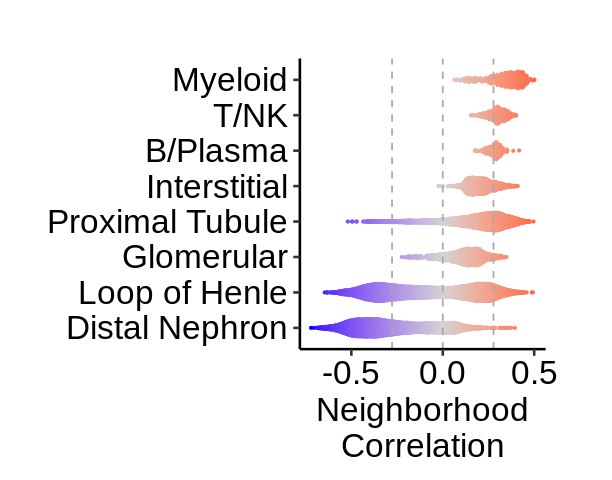

In [64]:
# meta = meta %>% mutate(final_annotation_num = final_annotation %>% str_split('. ') %>% map(1) %>% unlist)
meta = meta %>% mutate(final_annotation_num = cell.type)
pos_fdr_thresh <- fdr
neg_fdr_thresh <- -1 * fdr

interval <- c(-max(abs(meta$ncorr)), max(abs(meta$ncorr)))


violin_plot <- ggplot(meta, aes(y = reorder(final_annotation_num, ncorr), x = ncorr)) +
                    ggbeeswarm::geom_quasirandom(aes(color = ncorr), width = 0.25, size = 0.5) +
                    geom_vline(xintercept = neg_fdr_thresh, linetype = "dashed", color = "darkgrey") +
                    geom_vline(xintercept = pos_fdr_thresh, linetype = "dashed", color = "darkgrey") +
                    geom_vline(xintercept = 0, linetype = "dashed", color = "darkgrey") +
                    scale_color_gradient2(low = 'blue', mid = 'lightgray', high = 'red', na.value = "lightgrey",
                                            guide = guide_colorbar(direction = "horizontal"),
                                           breaks = seq(-1, 1, by = 0.5)
                                           ) + 
                    scale_x_continuous(breaks = pretty(meta$ncorr, n = 3)) +
                    labs( x= "Neighborhood\nCorrelation", y = "", title = "") +
                    theme_classic(base_size = tickfontsize) +
                    theme(text=element_text(family="Arial"),
                        legend.position = "none",
                        panel.grid = element_blank(),
                        axis.text.x = element_text(color = "black", size = labelfontsize, hjust=0.5),
                        axis.text.y = element_text(color = "black", size = labelfontsize, hjust=1),
                        axis.title = element_text(size=labelfontsize, hjust = 0.5),
                        axis.line.x.bottom = element_line(color = 'black'),
                        axis.line.y.left   = element_line(color = 'black'),
                        plot.margin = margin(10, 40, 10, 10)
                         
                         )

height = 4
width = 5.1
fig.size(height, width)
outplot = violin_plot #+ plot_layout(heights = c(6, 1.5))
outplot

ggsave(paste0(figdir, 'downsampled_sn_violin_plot.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'downsampled_sn_violin_plot.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)